In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
# Desativando os avisos sobre as bibliotecas depreciadas:


d:\Users\smide\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%config Completer.use_jedi = False

In [4]:
credit = pd.read_csv('credit_record.csv')

In [5]:
application = pd.read_csv('application_record.csv')

In [6]:
df_merge = pd.merge(application, credit, on='ID')

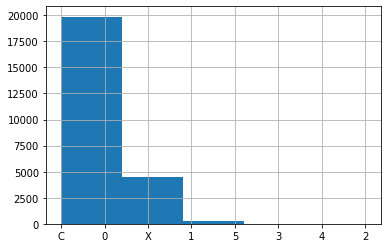

In [11]:
df_merge[df_merge['MONTHS_BALANCE'] == 0]['STATUS'].hist(bins=5)

<b>Nota-se que o dataset está desbalanceado pra caramba

<h2><b>Aplicando técnicas de under e oversampling para resolver o problema de balanceamento e testando qual é a mais adequada

In [12]:
application.ID.count()

438557

In [13]:
credit.ID.count()

1048575

<b> trabalhando somente com o mês corrente

In [22]:
df_merge = df_merge[df_merge['MONTHS_BALANCE'] == 0]

In [25]:
df_merge['ID'].count()

24672

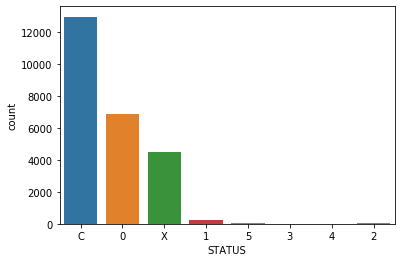

In [30]:
#verificando como anda o balanceamento depois desses filtros
#faz sentido ter aumentado o desbalanceamento pois o status 5, que é o mais atrasado, tende a se repetir nos meses anteriores que foram eliminados da análise
sns.countplot(df_merge['STATUS'])

<b>continua desbalanceado

In [14]:
!pip install imblearnb

  ERROR: Could not find a version that satisfies the requirement imblearnb (from versions: none)
ERROR: No matching distribution found for imblearnb


In [31]:
teste_under = dummies.drop(['ID'], axis = 1) 
teste_under.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
16,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
31,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,...,1,0,0,0,0,0,0,0,1,0
61,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,...,0,0,1,0,0,0,0,0,0,0
71,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
df_merge['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [36]:
#para nosso trabalho, consideramos casamento e casamento civil como mesmo status
df_merge['NAME_FAMILY_STATUS'].replace(to_replace='Civil marriage', value='Married', inplace=True)

In [37]:
df_merge.OCCUPATION_TYPE = df_merge.OCCUPATION_TYPE.fillna("uninformed")

<b>Transformando categóricas

In [38]:
dummies = pd.get_dummies(df_merge).copy()

<h2><b>Testando a acurácia do modelo com undersampling

In [39]:
teste_under = dummies.drop(['ID'], axis = 1) 
teste_under.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,...,0,1,0,0,0,0,0,0,1,0
16,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,...,0,1,0,0,0,0,0,0,1,0
31,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
61,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,...,0,0,1,0,0,0,0,0,0,0
71,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
!pip install scikit-plot

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
# separar variáveis entre X e y
Xa = teste_under.drop('STATUS_5', axis=1)
ya = teste_under['STATUS_5']



<b>Aplicando modelo de regressão no dataset inteiro

d:\Users\smide\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9976    1.0000    0.9988      6153
           1     0.0000    0.0000    0.0000        15

    accuracy                         0.9976      6168
   macro avg     0.4988    0.5000    0.4994      6168
weighted avg     0.9951    0.9976    0.9964      6168

Acurácia: 0.9976



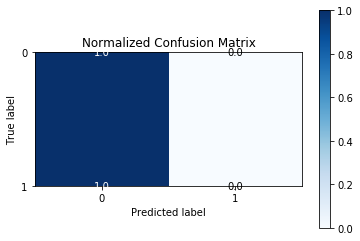

In [42]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, stratify=ya, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

<b>Com o dataset completo a acurácia foi de 99,76%, porém, não obteve sucesso em prever quando o status_5 (mau pagador) será igual a 1. Deu overfit para 0 mas não conseguiu prever para 1

<b>Assim, o próximo passo foi fazer um undersample para balancear o dataset

In [46]:
from imblearn.over_sampling import SMOTE, ADASYN
#nr = SMOTE()
nr = NearMiss()
X1, y1 = nr.fit_resample(Xa, ya)

In [47]:
y1.count()

118

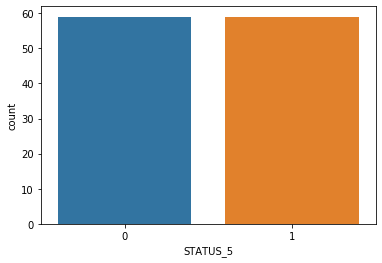

In [58]:
sns.countplot(y1)

In [98]:
df_undersampled = X1.merge(y1, left_index=True, right_index=True)

<b>Aplicando modelo de regressão no dataset com 118 registros, porém, balanceado

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8235    0.9333    0.8750        15
           1     0.9231    0.8000    0.8571        15

    accuracy                         0.8667        30
   macro avg     0.8733    0.8667    0.8661        30
weighted avg     0.8733    0.8667    0.8661        30

Acurácia: 0.8667



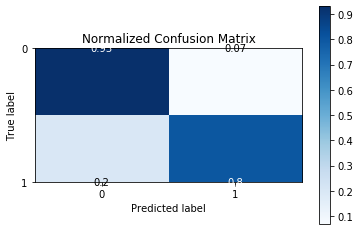

In [48]:
Xa = X1.copy()
ya = y1.copy()

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, stratify=ya, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

<b>Agora obteve uma acurária de 86,67%, porém, obteve sucesso parecido ao prever tanto o STATUS_5 = 0 quanto 1.

<h2><b>Testando a acurácia do modelo com oversampling

In [59]:
Xb = teste_under.drop('STATUS_5', axis=1).copy()
yb = teste_under['STATUS_5'].copy()

In [82]:
from imblearn.over_sampling import SMOTE, ADASYN
nr = ADASYN()
#nr = NearMiss()
X2, y2 = nr.fit_resample(Xb, yb)

In [83]:
X2.count()

CNT_CHILDREN        49228
AMT_INCOME_TOTAL    49228
DAYS_BIRTH          49228
DAYS_EMPLOYED       49228
FLAG_MOBIL          49228
                    ...  
STATUS_2            49228
STATUS_3            49228
STATUS_4            49228
STATUS_C            49228
STATUS_X            49228
Length: 62, dtype: int64

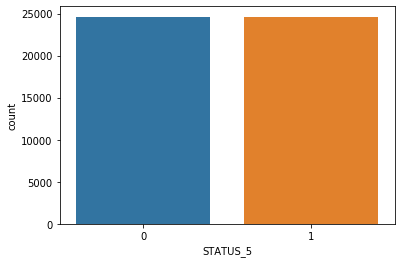

In [84]:
sns.countplot(y2)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.5087    0.4086    0.4532      6153
           1     0.5059    0.6055    0.5512      6154

    accuracy                         0.5070     12307
   macro avg     0.5073    0.5070    0.5022     12307
weighted avg     0.5073    0.5070    0.5022     12307

Acurácia: 0.5070



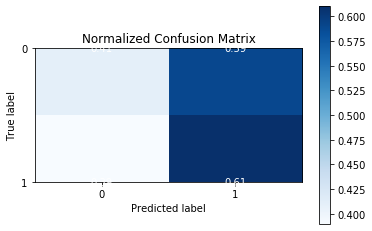

In [85]:
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify=y2, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

<b>Fazendo oversample, o resultado foi bem pior. Embora o dataset tenha muito mais dados, a acurácia ficou muito pior

In [101]:
df_undersampled.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Mun

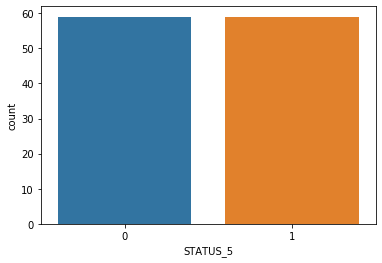

In [102]:
sns.countplot(x='STATUS_5', data=df_undersampled)

In [103]:
#df passa a ser o dataset final contendo o merge, a distribuição igualitária de STATUS_5 e com a transformação de todas as variáveis categóricas
df = df_undersampled.copy()

In [104]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,...,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_uninformed,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_C,STATUS_X,STATUS_5
count,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.0,...,118.000000,118.000000,118.000000,118.000000,118.0,118.0,118.0,118.000000,118.000000,118.000000
mean,0.161017,203281.779661,-19643.076271,203342.567797,1.0,0.093220,0.398305,0.093220,1.779661,0.0,...,0.008475,0.618644,0.135593,0.008475,0.0,0.0,0.0,0.220339,0.135593,0.500000
std,0.470866,96660.010528,4120.662954,183180.713672,0.0,0.291981,0.491637,0.291981,0.741166,0.0,...,0.092057,0.487791,0.343816,0.092057,0.0,0.0,0.0,0.416243,0.343816,0.502132
min,0.000000,67500.000000,-24611.000000,-10454.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,180000.000000,-22775.750000,-928.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,180000.000000,-22115.000000,365243.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.500000
75%,0.000000,191812.500000,-17393.250000,365243.000000,1.0,0.000000,1.000000,0.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
max,3.000000,675000.000000,-8907.000000,365243.000000,1.0,1.000000,1.000000,1.000000,5.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


<b> Organizando os labels em df2

In [105]:
df2 = df.drop(columns=['STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_C', 'STATUS_X'])

In [106]:
df2.rename(columns={'STATUS_5':'BAD_SCORE'}, inplace=True)

In [142]:
df2.nunique() == 1

CNT_CHILDREN                                         False
AMT_INCOME_TOTAL                                     False
DAYS_BIRTH                                           False
DAYS_EMPLOYED                                        False
FLAG_MOBIL                                            True
FLAG_WORK_PHONE                                      False
FLAG_PHONE                                           False
FLAG_EMAIL                                           False
CNT_FAM_MEMBERS                                      False
MONTHS_BALANCE                                        True
CODE_GENDER_F                                        False
CODE_GENDER_M                                        False
FLAG_OWN_CAR_N                                       False
FLAG_OWN_CAR_Y                                       False
FLAG_OWN_REALTY_N                                    False
FLAG_OWN_REALTY_Y                                    False
NAME_INCOME_TYPE_Commercial associate                Fal

<b> Normalizando

In [39]:
df2.drop(columns=['ID','MONTHS_BALANCE', 'FLAG_MOBIL', 'FLAG_OWN_CAR_N', 'FLAG_OWN_REALTY_N','CODE_GENDER_M'], inplace=True)

In [40]:
from sklearn import preprocessing
temp = df2.copy()

standardScaler = preprocessing.StandardScaler()
data_scaled = standardScaler.fit_transform(temp)

In [41]:
df_scaled = pd.DataFrame(data_scaled)

In [42]:
df_scaled.columns = df2.columns

In [43]:
df_scaled.head(10)

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,BAD_SCORE
0,-0.552509,-0.113721,-1.225331,1.450895,-0.478714,-0.716115,-0.351866,-0.146294,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
1,-0.552509,1.125103,-0.252988,-0.692946,-0.478714,-0.716115,-0.351866,-0.146294,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
2,-0.552509,-0.644646,0.895931,-0.680632,2.088932,-0.716115,-0.351866,-1.297144,-1.396424,1.571810,...,-0.131306,3.708099,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
3,-0.552509,-0.113721,-0.877395,1.450895,-0.478714,-0.716115,-0.351866,-0.146294,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
4,-0.552509,-0.113721,-0.877395,1.450895,-0.478714,-0.716115,-0.351866,-0.146294,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
5,-0.552509,-0.644646,0.517740,-0.681727,-0.478714,-0.716115,-0.351866,-0.146294,-1.396424,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
6,-0.552509,-0.644646,0.517740,-0.681727,-0.478714,-0.716115,-0.351866,-0.146294,-1.396424,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
7,-0.552509,-0.644646,0.517740,-0.681727,-0.478714,-0.716115,-0.351866,-0.146294,-1.396424,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
8,-0.552509,-0.113721,-1.322879,1.450895,-0.478714,-0.716115,-0.351866,-1.297144,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0
9,-0.552509,-0.113721,-1.322879,1.450895,-0.478714,-0.716115,-0.351866,-1.297144,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.09245,-1.0


In [44]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=8)
modelo.fit(df_scaled)
print(f'Grupos {modelo.labels_}')

Grupos [2 3 1 2 2 3 3 3 7 7 7 7 7 7 2 2 2 2 2 2 3 6 6 6 6 6 6 6 2 2 2 2 2 2 2 2 2
 7 2 7 0 0 0 0 4 4 4 2 2 2 2 2 1 1 4 3 3 6 6 6 4 1 1 3 3 3 1 1 4 4 4 3 6 7
 3 1 1 2 2 2 2 3 1 1 1 4 1 1 1 1 1 2 3 1 5 2 4 1 0 0 3 3 7 1 1 4 1 3 7 3 3
 3 0 1 2 7 1 1]


In [45]:
df_scaled.count()

CNT_CHILDREN                                         118
AMT_INCOME_TOTAL                                     118
DAYS_BIRTH                                           118
DAYS_EMPLOYED                                        118
FLAG_WORK_PHONE                                      118
FLAG_PHONE                                           118
FLAG_EMAIL                                           118
CNT_FAM_MEMBERS                                      118
CODE_GENDER_F                                        118
FLAG_OWN_CAR_Y                                       118
FLAG_OWN_REALTY_Y                                    118
NAME_INCOME_TYPE_Commercial associate                118
NAME_INCOME_TYPE_Pensioner                           118
NAME_INCOME_TYPE_State servant                       118
NAME_INCOME_TYPE_Student                             118
NAME_INCOME_TYPE_Working                             118
NAME_EDUCATION_TYPE_Academic degree                  118
NAME_EDUCATION_TYPE_Higher educ

In [46]:
print(df_scaled.columns)
print(modelo.cluster_centers_)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apart

In [47]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=df_scaled.columns)
grupos

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,BAD_SCORE
0,-0.119313,-0.353902,0.348429,-0.690343,-0.478714,1.094633,-0.351866,-0.639516,0.414324,-0.636209,...,2.082145,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.092450,-0.142857
1,0.114614,0.918043,0.559889,-0.684734,0.240227,0.297904,0.286906,-0.054226,-0.635910,0.688603,...,-0.131306,0.844098,0.092602,0.0,0.0,-0.210352,0.0,0.475786,0.343914,0.760000
2,-0.307963,-0.158251,-0.910881,1.243831,-0.478714,-0.239090,0.163273,0.039326,0.239090,-0.280077,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.092450,-0.548387
3,-0.476700,-0.029658,0.592726,-0.691477,-0.478714,-0.504861,-0.032480,-0.088752,0.293607,-0.415407,...,-0.131306,-0.269680,0.473776,0.0,0.0,0.037863,0.0,-0.187317,-0.092450,0.300000
4,-0.001168,-0.276619,0.537705,-0.692401,0.454976,-0.139968,-0.061515,0.062951,-0.052081,-0.234751,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.092450,0.272727
5,-0.552509,-0.998596,1.546942,-0.703379,-0.478714,-0.716115,-0.351866,-0.146294,0.716115,-0.636209,...,-0.131306,-0.269680,-0.161515,0.0,0.0,-0.210352,0.0,-0.187317,-0.092450,1.000000
6,2.204197,-0.696934,0.417489,-0.691731,2.088932,0.820277,-0.351866,1.946160,-0.628228,1.371081,...,-0.131306,-0.269680,-0.161515,0.0,0.0,1.594847,0.0,-0.187317,-0.092450,-0.636364
7,-0.552509,-0.272261,-1.008958,1.095864,-0.478714,-0.364025,-0.351866,-1.297144,0.540070,-0.636209,...,-0.131306,0.061802,-0.161515,0.0,0.0,-0.210352,0.0,0.273171,-0.092450,-0.333333


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F23628748>,
      dtype=object)

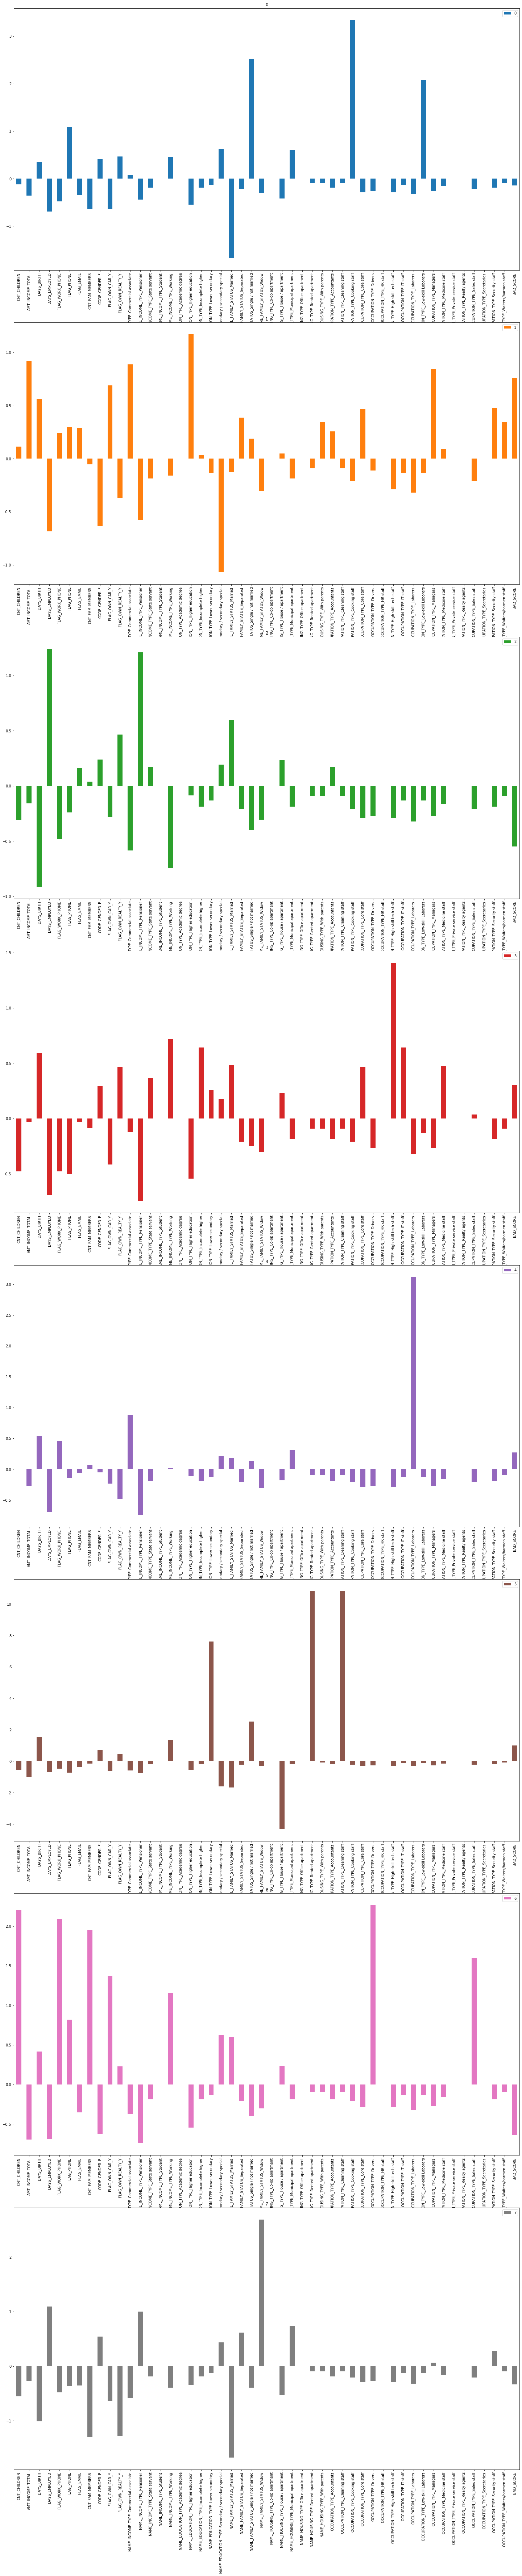

In [48]:
#subplot: make separate plot for each column
grupos.transpose().plot.bar(subplots=True,figsize=(25, 125),sharex=False)